# Preprocessing

## Preprocessing Videos

In [1]:
# Get video list, and convert to picture
import os
import matplotlib.pyplot as plt

folder_path = '../Dataset/video'
file_names = [files for files in os.listdir(folder_path) if files.endswith(".mp4")]

print("Video List:", file_names)

path_list = []
for name in file_names:
    path_list.append(os.path.join(folder_path, name))

print("Video Paths:", path_list)


Video List: ['Communal1.mp4', 'Communal2.mp4', 'VA1.mp4', 'VA2.mp4', 'VA3.mp4', 'VA4.mp4']
Video Paths: ['../Dataset/video\\Communal1.mp4', '../Dataset/video\\Communal2.mp4', '../Dataset/video\\VA1.mp4', '../Dataset/video\\VA2.mp4', '../Dataset/video\\VA3.mp4', '../Dataset/video\\VA4.mp4']


## Extract Frames

In [7]:
import cv2
import os

for video in path_list: 
    video_name = video
    print("Processing video: " + file_names[path_list.index(video)])

    cap = cv2.VideoCapture(video_name)

    time_skips = float(1000) #skip every 1 seconds. modify if need

    count = 0
    success,image = cap.read()
    while success:
        # save image
        img_name =  f'../Dataset/images/{file_names[path_list.index(video)][:-4]}/frame{count}.jpg'
        cv2.imwrite(img_name, image)

        cap.set(cv2.CAP_PROP_POS_MSEC, (count*time_skips))

        # move the time
        success,image = cap.read()
        count += 1

    # release after reading    
    cap.release()

print("Finish Processing all videos.")

Processing video: Communal1.mp4
Processing video: Communal2.mp4
Processing video: VA1.mp4
Processing video: VA2.mp4
Processing video: VA3.mp4
Processing video: VA4.mp4
Finish Processing all videos.


## Preprocessing label with image-frames

In [4]:
# Processing data and label in every frame
import jsonlines # read annotation from .jsonl file
import os
import fnmatch

# load images
root = "../Dataset/label"
label_files = [files for files in os.listdir(root) if files.endswith(".jsonl")]

# print("Video List:")
# print(file_names)

customerNum = []
for file in label_files: 
    customer = []
    # print(file)
    file = os.path.join(root, file)
    if os.path.exists(file):
        # print('File exists')
        with jsonlines.open(file) as reader:
            # save annotation and file name into list
            for line in reader:
                num = line['customernum']
                customer.append(num)
    else:
        raise ValueError('Invalid label file path [%s]'%file)
    customerNum.append(customer)

print(customerNum)

# Get number of frames in every video 
# for checking
folder_dict = {}
for path, dirs, files in os.walk('../Dataset/images/Original'):
    folder_name = os.path.basename(path)
    file_count = len(fnmatch.filter(files, '*.jpg'))
    folder_dict[folder_name] = file_count

print(folder_dict) # number of frames



[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

# Algorithm for people detection

## HOG Algorithm

### detecting people Algorithm - HOG

Processing video: Communal1.mp4


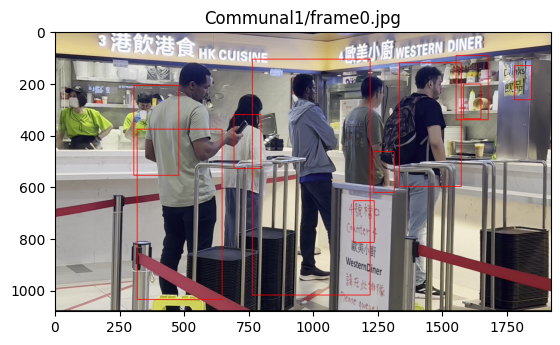

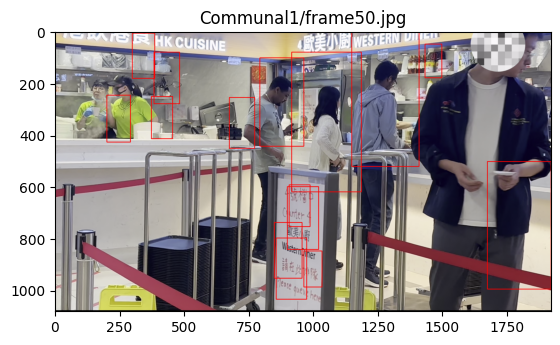

Processing video: Communal2.mp4


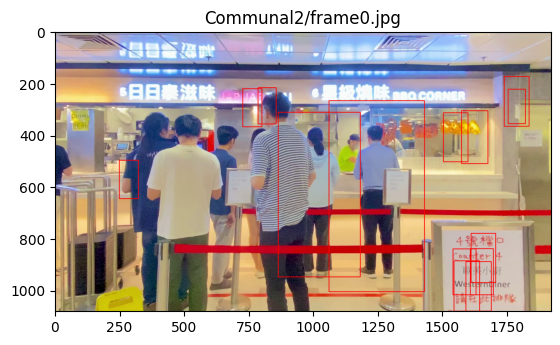

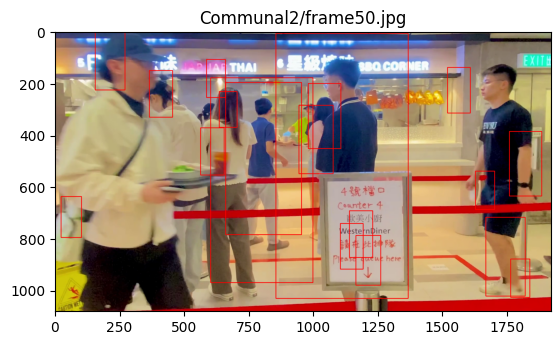

Processing video: VA1.mp4


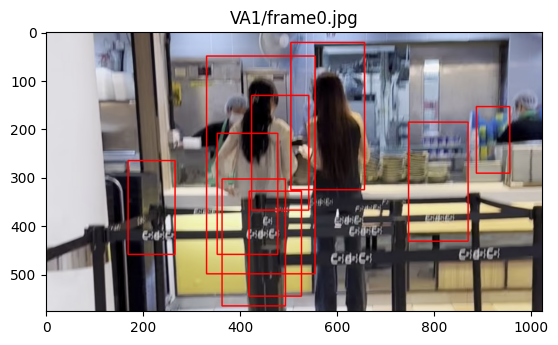

Processing video: VA2.mp4


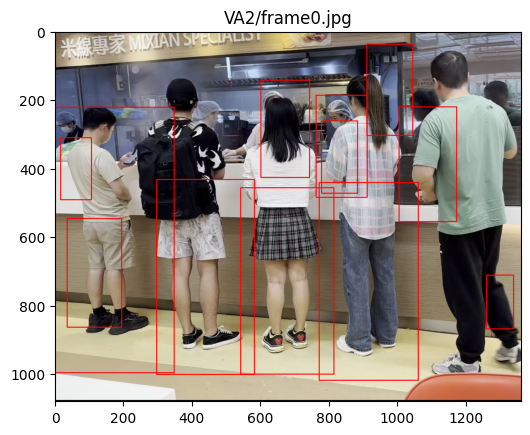

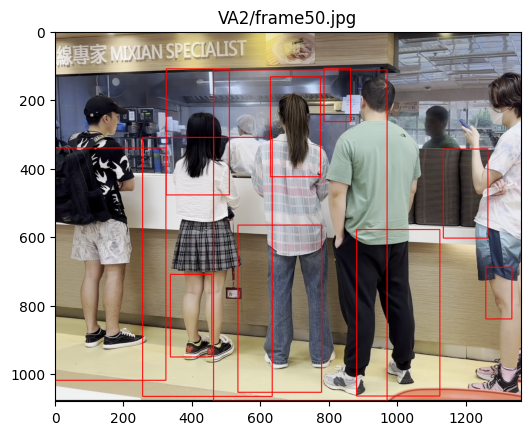

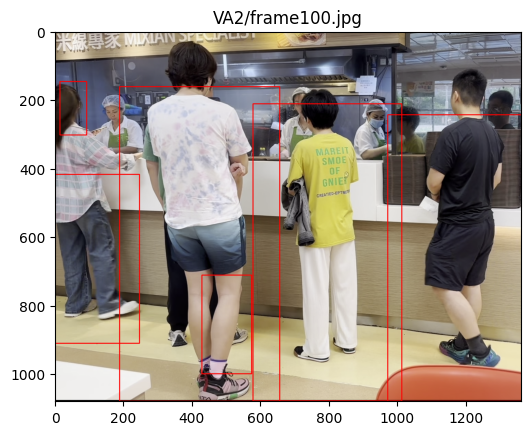

Processing video: VA3.mp4


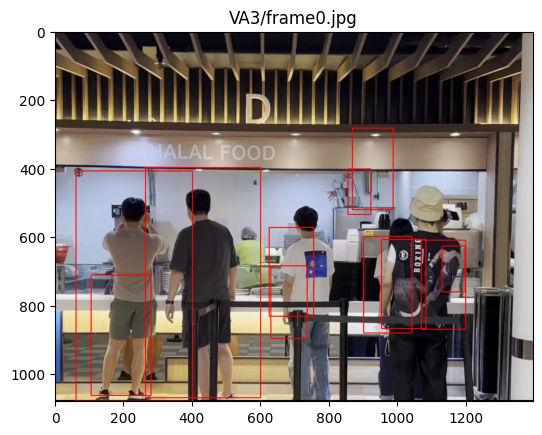

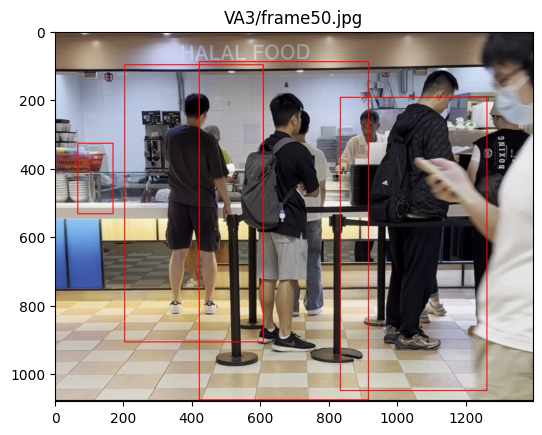

Processing video: VA4.mp4


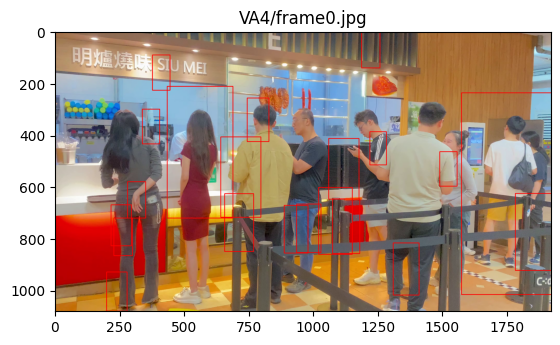

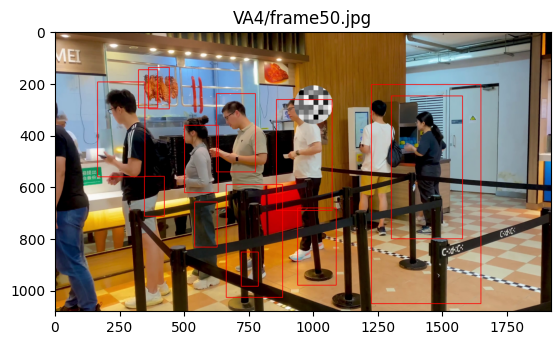

Finish Processing all videos.


In [109]:
import cv2
import matplotlib.pyplot as plt

# Initialize HOG person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

pred_customer_num = []
for video in path_list: 
    print("Processing video: " + file_names[path_list.index(video)])

    # Open video
    cap = cv2.VideoCapture(video)

    time_skips = float(1000) #skip every 1 seconds. modify if need

    count = 0
    success,image = cap.read()
    pred_num_people = []
    img_count = 0
    while success:
            
        # Detect people in the image
        boxes, weights = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)

        # Draw rectangle around each person
        for (x, y, w, h) in boxes:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
        # Display the image using matplotlib
        img_name =  file_names[path_list.index(video)][:-4] + "/frame%d.jpg" % count
        if count % 50 == 0:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(img_name)
            plt.show()
            
        # Count the number of people detected
        num_people = len(boxes)

        pred_num_people.append(num_people)
        cap.set(cv2.CAP_PROP_POS_MSEC, (count*time_skips))

        # move the time
        success,image = cap.read()
        count += 1

    pred_customer_num.append(pred_num_people)
    # release after reading    
    cap.release()

print("Finish Processing all videos.")


### Match Rate for all algorithm

In [111]:
# Match Rate
def match_rate(original, pred):
    match_rate = []
    for i in range(len(original)):
        match = 0
        for j in range(len(original[i])):
            if original[i][j] == pred[i][j]:
                match += 1
        rate = match / len(pred[i])
        match_rate.append(rate)
    return match_rate

### Accuracy for HOG + SVM

In [112]:
print("Match Rate for 6 videos for HOG:")
print(match_rate(customerNum, pred_customer_num))

Match Rate for 6 videos for HOG:
[0.0, 0.0, 0.0, 0.032, 0.021505376344086023, 0.0]


## Improved parameter in HOG Algorithm

Processing video: Communal1.mp4


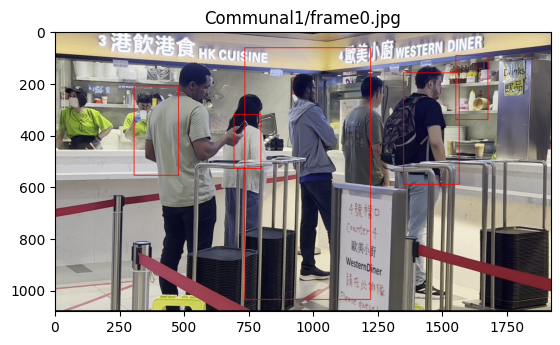

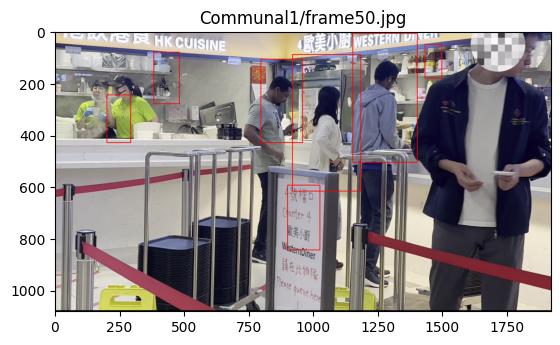

Processing video: Communal2.mp4


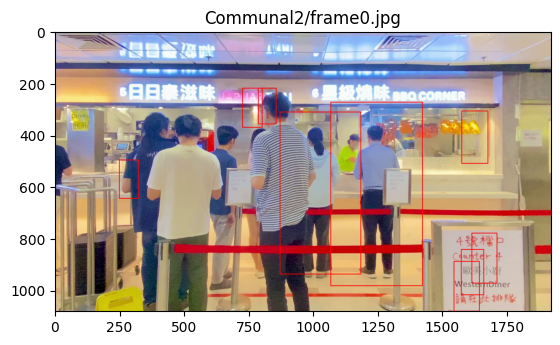

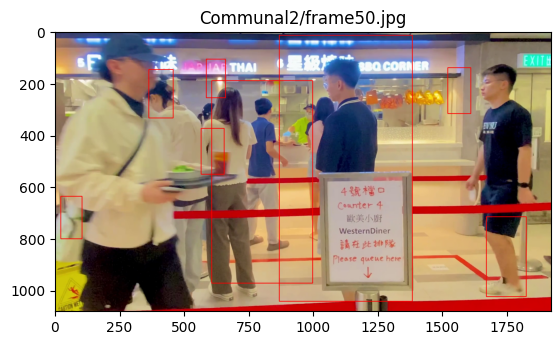

Processing video: VA1.mp4


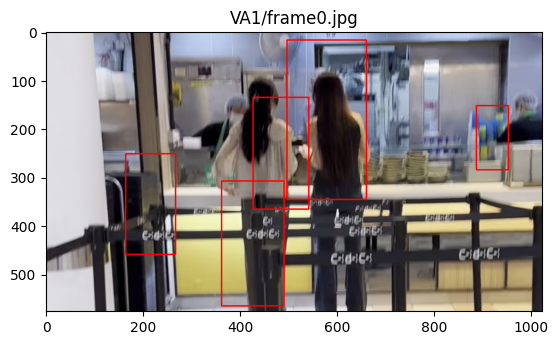

Processing video: VA2.mp4


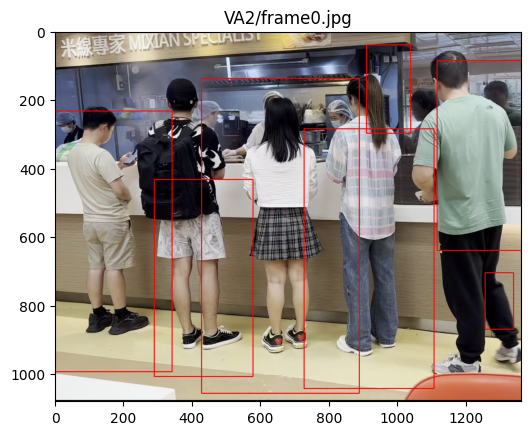

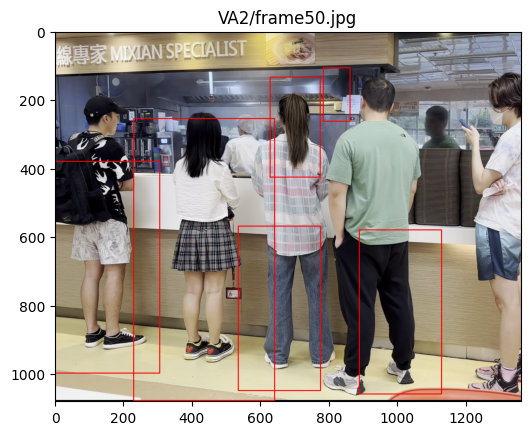

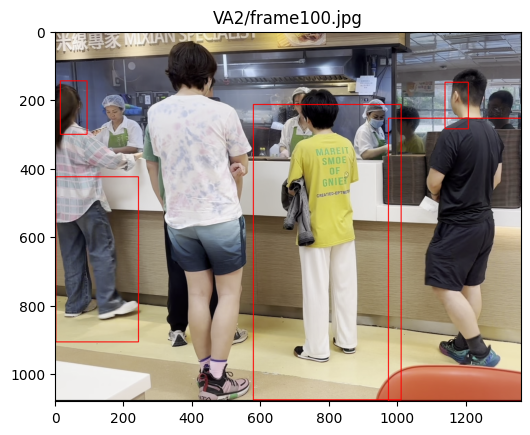

Processing video: VA3.mp4


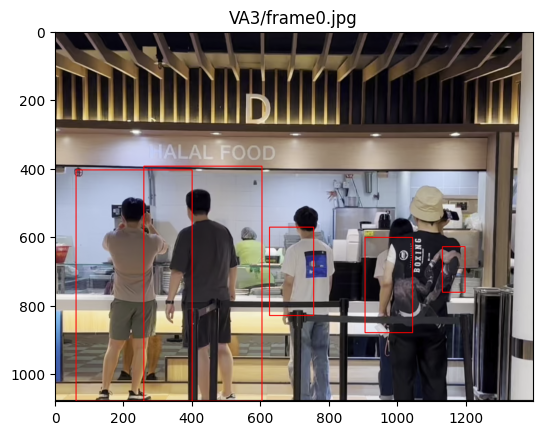

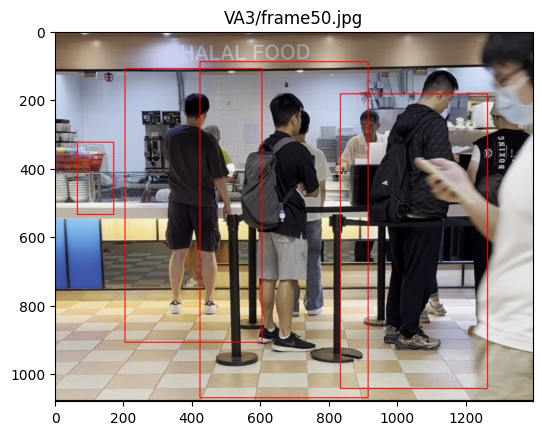

Processing video: VA4.mp4


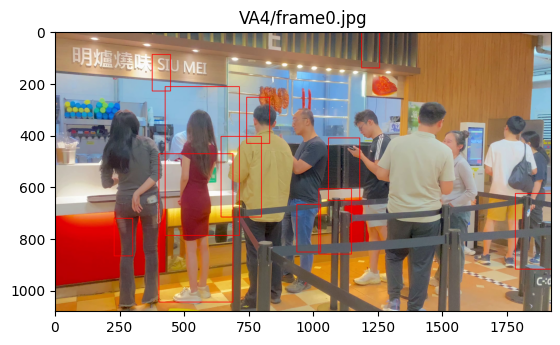

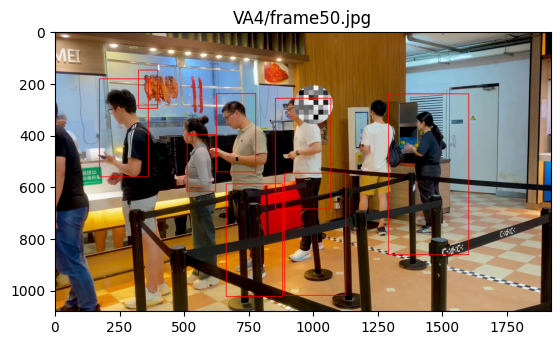

Finish Processing all videos.


In [118]:
import cv2
import numpy as np
from imutils.object_detection import non_max_suppression

# Initialize HOG person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

people_list_HOG_2=[]
for video in path_list: 
    print("Processing video: " + file_names[path_list.index(video)])
    cap = cv2.VideoCapture(video)

    time_skips = float(1000) #skip every 1 seconds. modify if need

    count = 0
    success,image = cap.read()
    pred_num_people = []
    while success:
            
        # Detect people in the image
        boxes, weights = hog.detectMultiScale(image, winStride=(6, 6), padding=(7, 7), scale=1.05)

    # Apply non-maxima suppression to the bounding boxes using a
    # fairly large overlap threshold to try to maintain overlapping
    # boxes that are still people
        boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])
        pick = non_max_suppression(boxes, probs=None, overlapThresh=0.65)
        # Draw rectangle around each person
        #for (x, y, w, h) in boxes:
            #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
        # Draw the final bounding boxes
        for (xA, yA, xB, yB) in pick:
            cv2.rectangle(image, (xA, yA), (xB, yB), (0, 0, 255), 2)
        
        # Display the image using matplotlib
        img_name =  file_names[path_list.index(video)][:-4] + "/frame%d.jpg" % count
        if count % 50 == 0:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(img_name)
            plt.show()
        
        # save image
        # cv2.imwrite("/Users/tracyhanwenyu/Desktop/images/frame%d.jpg" % count, image)
        
        # Count the number of people detected
        num_people = len(boxes)
        # print('Number of people detected:', num_people)
        pred_num_people.append(num_people)
        cap.set(cv2.CAP_PROP_POS_MSEC, (count*time_skips))
        # print('New frame captured: ' + str(count))

        # move the time
        success,image = cap.read()
        count += 1

    people_list_HOG_2.append(pred_num_people)
    # release after reading    
    cap.release()
print("Finish Processing all videos.")

In [119]:
print("Match Rate for 6 videos for HOG improved:")
print(match_rate(customerNum, people_list_HOG_2))

Match Rate for 6 videos for HOG improved:
[0.017543859649122806, 0.10666666666666667, 0.08, 0.04, 0.10752688172043011, 0.021739130434782608]


## YOLOv5
Using YOLOv5 model to detect people in picture

### YOLOv5 Algorithm

In [18]:
# convert into img path list and then sort by number in file name
import os

frame_path = '../Dataset/images/Original'
img_path_list = []

for root, dirs, files in os.walk(frame_path):
    temp_list = []
    for dir_name in dirs:
        # Create the full path to the directory
        dir_path = os.path.join(root, dir_name)
        # Get the names of all .jpg files in the directory
        for file in os.listdir(dir_path):
            if file.endswith(".jpg"):
                temp_list.append(os.path.join(dir_path, file))
        
        # Add the full paths to the .jpg files to temp_list
        # img_path_list.append(temp_list)
        # print(temp_list)
        temp_list.sort(key=lambda x: int(x[len(dir_path)+6:-4]))
        img_path_list.append(temp_list)
        temp_list = []


In [19]:
# %cd content
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5
# %pip install -r requirements.txt

# from yolov5 import utils
# display = utils.notebook_init()

# !python detect.py --weights yolov5s.pt --img 256 --conf 0.25 --source ../../Dataset/images/Original/Communal1

# reference: https://github.com/ultralytics/yolov5/issues/36

import torch

# Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model = model.to(device)  # Move the model to GPU
model.eval()

people_list = []
for img_path in img_path_list:
    temp_list = []
    for img in img_path:
        # # Image
        # im = '../Dataset/images/Original/Communal1/frame0.jpg'

        # Inference
        results = model(img)

        # print(results.pandas().xyxy[0])
        # results.pandas().xyxy[0]
        #      xmin    ymin    xmax   ymax  confidence  class    name
        # 0  749.50   43.50  1148.0  704.5    0.874023      0  person
        # 1  433.50  433.50   517.5  714.5    0.687988     27     tie
        # 2  114.75  195.75  1095.0  708.0    0.624512      0  person
        # 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

        # Filter the DataFrame to only include rows where 'name' is 'person'
        people = results.pandas().xyxy[0][results.pandas().xyxy[0]['name'] == 'person']
        # confidence = people['confidence']
        # # Get the number of people
        num_people = len(people)
        # # Calculate the average confidence
        # average_confidence = confidence.mean()
        # print('Number of people detected:', num_people)
        temp_list.append(num_people)

        # # print('Confidence:', confidence)
        # print('Average confidence:', average_confidence)
    # print(temp_list)
    people_list.append(temp_list)

# print(people_list)
print("finish processing all videos.")


Using cache found in C:\Users\zoezh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-7 Python-3.9.7 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


[8, 8, 7, 8, 9, 9, 8, 9, 10, 9, 9, 8, 8, 9, 8, 8, 9, 9, 7, 7, 7, 7, 6, 6, 7, 6, 5, 6, 5, 5, 5, 5, 6, 5, 3, 5, 4, 6, 7, 6, 6, 7, 6, 6, 6, 7, 7, 8, 6, 7, 7, 8, 7, 7, 6, 4, 3]
[9, 9, 8, 7, 7, 9, 9, 10, 9, 8, 7, 8, 8, 10, 10, 7, 12, 6, 10, 8, 8, 8, 9, 7, 9, 7, 7, 8, 11, 11, 13, 12, 7, 10, 8, 8, 7, 7, 5, 6, 8, 6, 8, 9, 6, 11, 8, 9, 8, 9, 10, 12, 9, 8, 8, 8, 9, 7, 8, 7, 6, 7, 7, 6, 6, 5, 2, 10, 7, 7, 7, 8, 7, 6, 7]
[4, 4, 5, 3, 4, 5, 4, 4, 2, 3, 2, 3, 3, 1, 3, 3, 3, 2, 2, 1, 2, 2, 4, 4, 3]
[8, 8, 8, 10, 9, 10, 9, 8, 8, 9, 8, 8, 8, 7, 8, 9, 9, 9, 10, 8, 9, 10, 7, 8, 7, 7, 10, 10, 9, 8, 8, 7, 7, 9, 9, 10, 7, 8, 9, 8, 8, 7, 8, 8, 8, 7, 8, 7, 6, 6, 8, 7, 6, 9, 8, 9, 9, 9, 9, 8, 8, 7, 9, 7, 6, 9, 10, 11, 11, 9, 9, 7, 11, 10, 10, 9, 9, 9, 9, 10, 8, 8, 10, 10, 12, 8, 9, 9, 8, 7, 8, 9, 7, 9, 8, 8, 7, 7, 11, 10, 10, 9, 11, 9, 9, 8, 9, 9, 8, 11, 8, 9, 8, 10, 9, 9, 8, 10, 9, 9, 10, 6, 8, 8, 9]
[5, 5, 5, 5, 5, 6, 5, 5, 4, 5, 6, 5, 6, 7, 6, 6, 5, 5, 6, 6, 8, 7, 6, 8, 6, 7, 6, 7, 6, 7, 7, 8, 10, 7, 5, 6, 

### Detection Accuracy for YOLOv5 Model

In [26]:
print("Match rate for 6 videos for YOLOv5:")
print(match_rate(customerNum, people_list))

[0.017543859649122806, 0.18666666666666668, 0.16, 0.0, 0.3870967741935484, 0.09782608695652174]


## Faster R-CNN

### R-CNN Model Algorithm

In [21]:
import torchvision
import cv2
import numpy as np
import torch
import torchvision.transforms as T

# Load the pre-trained Faster R-CNN model

########################### cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model = model.to(device)  # Move the model to GPU
model.eval()

people_list_RCNN = []
# load video path for capture
for video in path_list:
    temp_list =[]
    print("Processing video:", video)
    # Load the video
    cap = cv2.VideoCapture(video)

    # Initialize frame counter
    #frame_counter = 0
    #seconds = 0
    count = 0
    time_skips = float(1000) #skip every 1 seconds. modify if need

    while True:
    #fps = cap.get(cv2.CAP_PROP_FPS)

    #while(cap.isOpened()):
        # Set the position in the video to the current second
        cap.set(cv2.CAP_PROP_POS_MSEC, count * time_skips)
        # Read the next frame
        ret, frame = cap.read()

        if not ret:
            break

        frame_model = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_model = frame_model / 255.0
        frame_model = np.transpose(frame_model, (2, 0, 1))
        frame_model = torch.from_numpy(frame_model).float().to(device) ########################### cuda
        # frame_model = torch.from_numpy(frame_model).float()

        # Apply the Faster R-CNN model to the frame
        output = model([frame_model])
        ########################### cuda
        output = [{k: v.to('cpu') for k, v in t.items()} for t in output]

        # Apply non-maximum suppression
        nms_indices = torchvision.ops.nms(output[0]['boxes'], output[0]['scores'], 0.3)
        output[0]['boxes'] = output[0]['boxes'][nms_indices]
        output[0]['labels'] = output[0]['labels'][nms_indices]

        # Filter out the detections with low confidence scores
        high_conf_indices = [i for i, score in enumerate(output[0]['scores']) if score > 0.7]
        output[0]['boxes'] = output[0]['boxes'][high_conf_indices]
        output[0]['labels'] = output[0]['labels'][high_conf_indices]

        # Count the number of people detected in the frame
        num_people = sum(1 for box, label in zip(output[0]['boxes'], output[0]['labels']) if label == 1)

        # Draw bounding boxes around the detected people
        for box, label in zip(output[0]['boxes'], output[0]['labels']):
                if label == 1:
                    cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)   

        # Count the number of people detected in the frame
        num_people = sum(1 for box, label in zip(output[0]['boxes'], output[0]['labels']) if label == 1)
            
        # Print the number of people detected in the frame along with the frame number
        print(f'Frame {count}: Number of people: {num_people}')
        temp_list.append(num_people)

        count += 1
    # Release the video capture
    cap.release()
    print(video, temp_list)
    people_list_RCNN.append(temp_list)

# Close all OpenCV windows
cv2.destroyAllWindows()

Processing video: ../Dataset/video\Communal1.mp4
Frame 0: Number of people: 7
Frame 1: Number of people: 7
Frame 2: Number of people: 8
Frame 3: Number of people: 8
Frame 4: Number of people: 7
Frame 5: Number of people: 8
Frame 6: Number of people: 8
Frame 7: Number of people: 7
Frame 8: Number of people: 8
Frame 9: Number of people: 8
Frame 10: Number of people: 7
Frame 11: Number of people: 8
Frame 12: Number of people: 7
Frame 13: Number of people: 8
Frame 14: Number of people: 8
Frame 15: Number of people: 9
Frame 16: Number of people: 8
Frame 17: Number of people: 7
Frame 18: Number of people: 7
Frame 19: Number of people: 7
Frame 20: Number of people: 6
Frame 21: Number of people: 6
Frame 22: Number of people: 6
Frame 23: Number of people: 6
Frame 24: Number of people: 5
Frame 25: Number of people: 5
Frame 26: Number of people: 6
Frame 27: Number of people: 5
Frame 28: Number of people: 5
Frame 29: Number of people: 4
Frame 30: Number of people: 6
Frame 31: Number of people: 5
F

### Acuuracy for faster RCNN algorithm

In [27]:
# print(people_list_RCNN)
print("Match Rate for 6 videos for faster RCNN:")
print(match_rate(customerNum, people_list_RCNN))

Match Rate for 6 videos for faster RCNN:
[0.05357142857142857, 0.08108108108108109, 0.20833333333333334, 0.0, 0.43478260869565216, 0.04395604395604396]


# Serving Time Calculation

## Preprocessing data

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Read the CSV file
df = pd.read_csv('../Dataset/label/servingTime.csv')

df_va = df[df['window'].str.startswith('VA')]
df_communal = df[df['window'].str.startswith('Communal')]
df_va = df_va.reset_index(drop=True)
# print(df_va)

In [15]:
# Print the DataFrame of 2 canteens
# print(df)
print(f'There are {df.isnull().any().sum()} columns in the dataset with missing values.')
print(f'The dataset of VA canteen has {df_va.shape[0]} rows and {df_va.shape[1]} columns.')
print(f'The dataset of Communal canteen has {df_communal.shape[0]} rows and {df_communal.shape[1]} columns.')
df_va.head()

There are 0 columns in the dataset with missing values.
The dataset of VA canteen has 18 rows and 4 columns.
The dataset of Communal canteen has 7 rows and 4 columns.


waitingTime  serviceTime  waitingPeople window
0           28           11              1    VA1
1           15           11              2    VA1
2           30           26              1    VA2
3           37            5              2    VA2
4           40           10              3    VA2

In [16]:
df_communal.head()

waitingTime  serviceTime  waitingPeople     window
0           13           13              0  Communal1
1           46           32              1  Communal1
2           55           35              2  Communal1
3           17           11              0  Communal2
4           31           32              1  Communal2

## Waiting time prediction for VA

In [21]:
df_va.describe()

waitingTime  serviceTime  waitingPeople
count    18.000000    18.000000      18.000000
mean     31.888889    15.333333       2.166667
std      17.489119     9.222734       1.465285
min       0.000000     2.000000       0.000000
25%      20.500000    10.000000       1.000000
50%      34.000000    13.000000       2.000000
75%      43.750000    18.750000       3.000000
max      58.000000    42.000000       5.000000

31.88888888888889 17.489118932803667


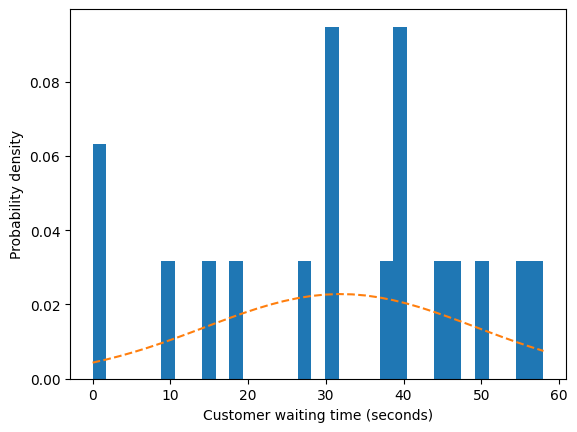

In [36]:
# data to be plotted
mu = df_va["waitingTime"].mean()  # mean of distribution
sigma = df_va["waitingTime"].std()  # standard deviation of distribution
x = df_va["waitingTime"]
num_bins = 33
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
   np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Customer waiting time (seconds)')
ax.set_ylabel('Probability density')
print(mu, sigma)

In [23]:
# mean encoding for regression output
def mean_encoder_regression(input_vector, output_vector):
    assert len(input_vector) == len(output_vector)
    numberOfRows = len(input_vector)

    temp = pd.concat([input_vector, output_vector], axis=1)
    # Compute target mean
    averages = temp.groupby(by=input_vector.name)[output_vector.name].agg(["mean", "count"])

    print(averages)
    return_vector = pd.DataFrame(0, index=np.arange(numberOfRows), columns={'feature'})


    for i in range(numberOfRows):
        return_vector.iloc[i] = averages['mean'][input_vector.iloc[i]]

    return return_vector

### Prediction

In [24]:
workingCopyVA = df_va
workingCopyVA.drop(['serviceTime'], axis=1)
encoded_input_vector_window_va = mean_encoder_regression(workingCopyVA['window'], workingCopyVA['waitingTime'])
encoded_input_vector_window_va.columns = ['window']

             mean  count
window                  
VA1     21.500000      2
VA2     36.600000      5
VA3     33.666667      6
VA4     29.200000      5


In [25]:
X = pd.concat([pd.DataFrame(workingCopyVA['waitingPeople']), encoded_input_vector_window_va['window']], axis=1)
y = workingCopyVA['waitingTime']

X.describe()
# print(X)
# print(df_va)

waitingPeople     window
count      18.000000  18.000000
mean        2.166667  31.888889
std         1.465285   4.739970
min         0.000000  21.500000
25%         1.000000  29.200000
50%         2.000000  33.666667
75%         3.000000  35.866667
max         5.000000  36.600000

In [26]:
print(X.shape)
print(y.shape)

(18, 2)
(18,)


In [27]:
from sklearn.model_selection import train_test_split

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.15, random_state=42)
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

(15, 2) (15,)
(3, 2) (3,)


In [28]:
def scale_input(X, means, stds):
    return (X - means) / stds

def descale_input(X, means, stds):
    return (X * stds) + means

In [29]:
meansX = trainX.mean(axis=0)
stdsX = trainX.std(axis=0) + 1e-10

In [30]:
trainX_scaled = scale_input(trainX, meansX, stdsX)
testX_scaled = scale_input(testX, meansX, stdsX)

In [37]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_absolute_error
NN = MLPRegressor(max_iter=500, activation = "relu", hidden_layer_sizes=(100,100))

NN.fit(trainX,trainy)

NN_pred = NN.predict(testX)

print("MAE for VA Canteen:   ", mean_absolute_error(testy,NN_pred))

MAE for VA Canteen:    13.995331312107668


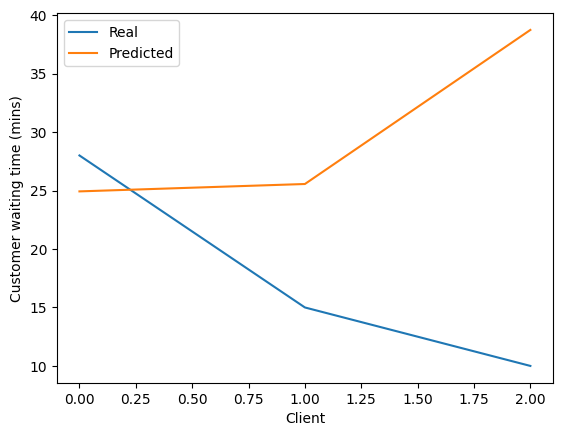

In [33]:
testy_pred = NN.predict(testX)
myLength = len(testy_pred)
plt.plot(range(myLength), testy)
plt.plot(range(myLength), testy_pred)
plt.ylabel('Customer waiting time (mins)')
plt.xlabel('Client')
plt.legend(['Real', 'Predicted'], loc='upper left')

In [34]:
myMae = mean_absolute_error(testy, testy_pred)
print(f'The mean absolute error for VA with the neural network is {myMae} seconds.')

The mean absolute error for VA with the neural network is 14.122988555126183 seconds.


## Waiting time prediction for Communal

In [17]:
df_communal.describe()

waitingTime  serviceTime  waitingPeople
count     7.000000     7.000000       7.000000
mean     36.142857    22.428571       1.285714
std      16.313885    10.179344       1.112697
min      13.000000    11.000000       0.000000
25%      24.000000    14.500000       0.500000
50%      41.000000    18.000000       1.000000
75%      48.000000    32.000000       2.000000
max      55.000000    35.000000       3.000000

Text(0, 0.5, 'Probability density')

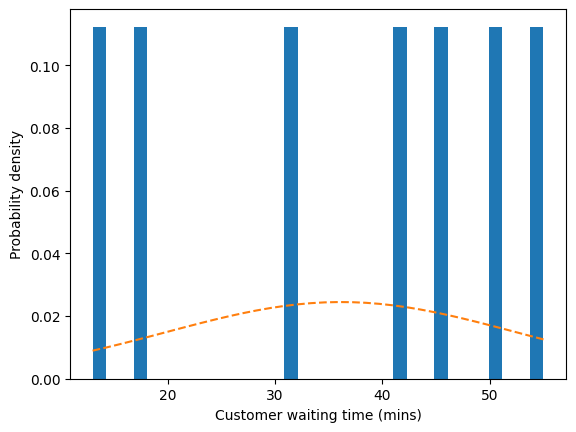

In [18]:
# data to be plotted
mu = df_communal["waitingTime"].mean()  # mean of distribution
sigma = df_communal["waitingTime"].std()  # standard deviation of distribution
x = df_communal["waitingTime"]
num_bins = 33
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
   np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Customer waiting time (mins)')
ax.set_ylabel('Probability density')

### Prediction

In [38]:
workingCopyC = df_communal
workingCopyC.drop(['serviceTime'], axis=1)
encoded_input_vector_window_c = mean_encoder_regression(workingCopyC['window'], workingCopyC['waitingTime'])
encoded_input_vector_window_c.columns = ['window']

            mean  count
window                 
Communal1  38.00      3
Communal2  34.75      4


In [39]:
X = pd.concat([pd.DataFrame(workingCopyC['waitingPeople']), encoded_input_vector_window_c['window']], axis=1)
y = workingCopyC['waitingTime']

X.describe()

waitingPeople     window
count       7.000000   7.000000
mean        1.285714  36.142857
std         1.112697   1.737198
min         0.000000  34.750000
25%         0.500000  34.750000
50%         1.000000  34.750000
75%         2.000000  38.000000
max         3.000000  38.000000

In [40]:
from sklearn.model_selection import train_test_split

# print(X.shape)
# print(y.shape)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.15, random_state=42)
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

(5, 2) (5,)
(2, 2) (2,)


In [41]:
meansX = trainX.mean(axis=0)
stdsX = trainX.std(axis=0) + 1e-10
trainX_scaled = scale_input(trainX, meansX, stdsX)
testX_scaled = scale_input(testX, meansX, stdsX)

MAE for Communal Canteen     16.785586225631405


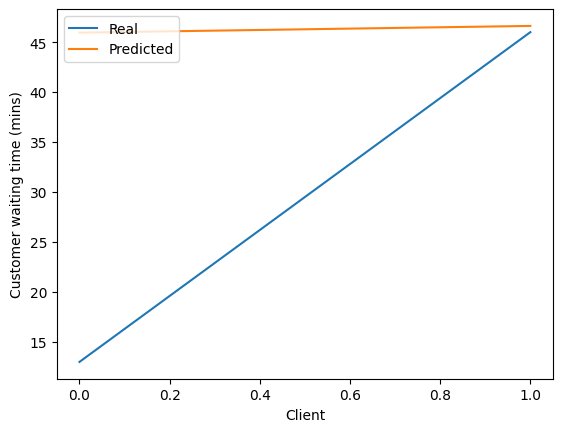

In [42]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_absolute_error
NN = MLPRegressor(max_iter=500, activation = "relu", hidden_layer_sizes=(100,100))

NN.fit(trainX,trainy)

NN_pred = NN.predict(testX)

print("MAE for Communal Canteen    ", mean_absolute_error(testy,NN_pred))
testy_pred = NN.predict(testX)
myLength = len(testy_pred)
plt.plot(range(myLength), testy)
plt.plot(range(myLength), testy_pred)
plt.ylabel('Customer waiting time (mins)')
plt.xlabel('Client')
plt.legend(['Real', 'Predicted'], loc='upper left')

In [30]:
myMae = mean_absolute_error(testy, testy_pred)
print(f'The mean absolute error for VA with the neural network is {myMae} seconds.')

The mean absolute error for VA with the neural network is 16.281377988082898 seconds.
